# Alissa Beaderstadt: Exploratory Data Analysis Project 6

Author: Alissa Beaderstadt

Purpose: Implement Jupyter Notebook to perform exploratory data analysis (EDA) using pandas and other tools. We will use the Seaborn library to load the Car Crashes dataset.

Date: 02-17-2025

# Introduction
Welcome to my notebook! In this project, I'll be diving into the Seaborn Car Crashes dataset. The main goal is to explore the data, spot any patterns, and identify key features.

Throughout this notebook, I'll be working with libraries like Pandas, Seaborn, and Matplotlib to load, visualize, and analyze the data. By the end, we will gain insights into car crash patterns, insurance premiums, and related factors. We will then go through some cool visualizations that’ll help us make sense of it all.

Let’s start this analysis!


# Imports
Below are the necessary imports for this notebook:

In [187]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Axes object (basic plot type returned by Seaborn)
from matplotlib.axes import Axes

# Step 1. Data Acquisition
Loading the car crashes dataset into a pandas DataFrame:

In [188]:
# Load the dataset into a pandas DataFrame 
df = sns.load_dataset('car_crashes')

# Inspect first rows of the DataFrame
print(df.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


# Step 2. Initial Data Inspection
Display the first 10 rows of the DataFrame, check the shape, and display the data types of each column:

In [189]:

print(df.head(10))
print(df.shape)
print(df.dtypes)

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   
5   13.6     5.032    3.808          10.744       12.920       835.50   
6   10.8     4.968    3.888           9.396        8.856      1068.73   
7   16.2     6.156    4.860          14.094       16.038      1137.87   
8    5.9     2.006    1.593           5.900        5.900      1273.89   
9   17.9     3.759    5.191          16.468       16.826      1160.13   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  
5      139.91     CO  
6      167.02     CT  
7      151.4

# Step 3. Initial Descriptive Statistics
Use the DataFrame describe() method to display summary statistics for each column:

In [190]:
print(df.describe())

           total   speeding    alcohol  not_distracted  no_previous  \
count  51.000000  51.000000  51.000000       51.000000    51.000000   
mean   15.790196   4.998196   4.886784       13.573176    14.004882   
std     4.122002   2.017747   1.729133        4.508977     3.764672   
min     5.900000   1.792000   1.593000        1.760000     5.900000   
25%    12.750000   3.766500   3.894000       10.478000    11.348000   
50%    15.600000   4.608000   4.554000       13.857000    13.775000   
75%    18.500000   6.439000   5.604000       16.140000    16.755000   
max    23.900000   9.450000  10.038000       23.661000    21.280000   

       ins_premium  ins_losses  
count    51.000000   51.000000  
mean    886.957647  134.493137  
std     178.296285   24.835922  
min     641.960000   82.750000  
25%     768.430000  114.645000  
50%     858.970000  136.050000  
75%    1007.945000  151.870000  
max    1301.520000  194.780000  


# Step 4. Initial Data Distribution for Numerical Columns
Use hist() to show histograms for ALL numerical columns:

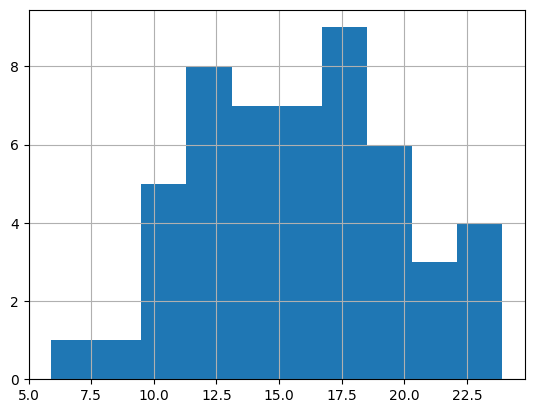

<Figure size 1000x800 with 0 Axes>

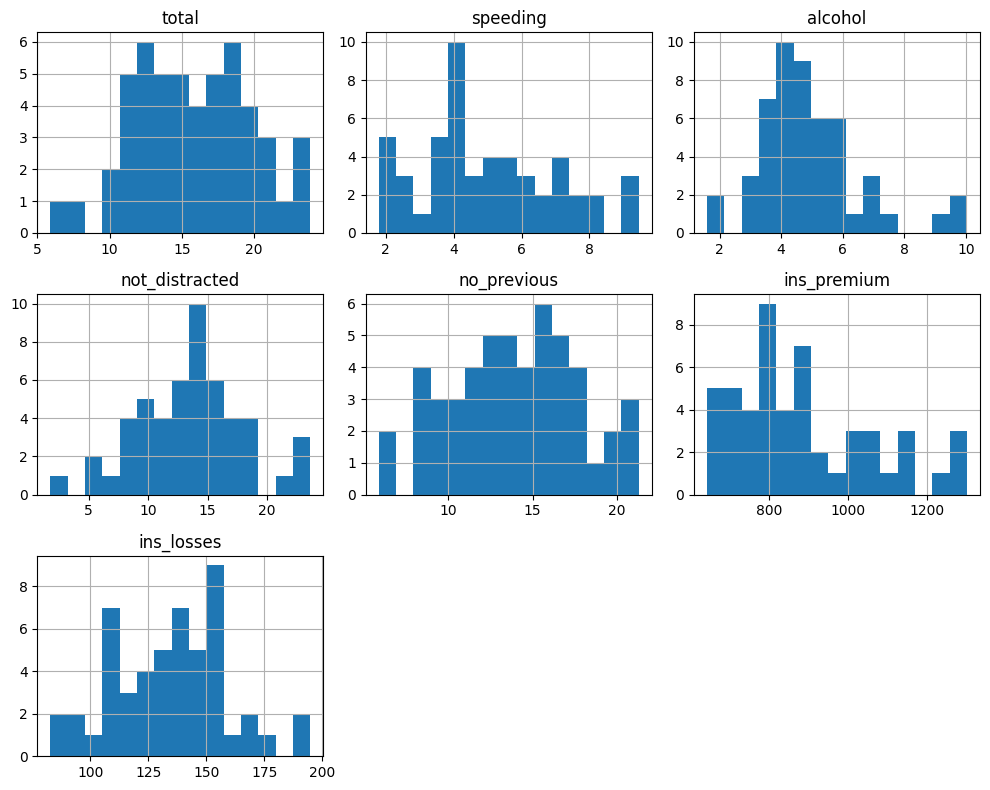

In [191]:
# Inspect histogram by numerical column
df['total'].hist()

# Set figure size to make sure plots don't overlap
plt.figure(figsize=(10, 8))

# Inspect histograms for all numerical columns
df.hist(bins=15, figsize=(10, 8), layout=(3, 3)) 

# Show all plots
plt.tight_layout() 
plt.show()


**Observations:**
- Based on the above histograms we can see that not_distracted has the most even distribution and most closely represents a bell curve.
- The alcohol histogram is right-skewed, with most values concentrated at the lower end.
- The total histogram shows a bimodal distribution.



# Step 5. Initial Data Distribution for Categorical Columns
Choose a categorical column and use df['column_name'].value_counts() to display the count of each category. Use a loop to show the value counts for all categorical columns:

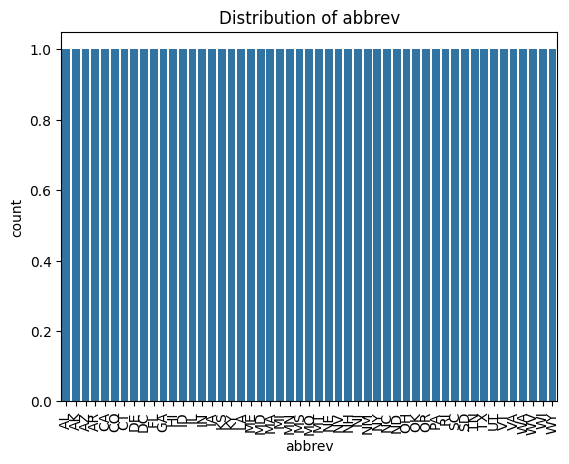

In [192]:
# Inspect value counts by categorical column
df['abbrev'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x='abbrev', data=df)
    plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()


**Observations:**
- The histogram for the abbrev column shows that each state abbreviation appears exactly once in the dataset. There are 51 unique abbreviations, which corresponds to all the U.S. states plus Washington D.C. This suggests that the dataset includes data for every state, and there are no missing entries for any state.

# Step 6. Initial Data Transformation and Feature Engineering
Use pandas and other tools to perform transformations:

In [193]:
# Rename the abbrev column to state_abbreviation
df.rename(columns={'abbrev': 'state_abbreviation'}, inplace=True)


print(df.head())


# Create a new column for the percentage of total crashes due to speeding
df['speeding_pct'] = (df['speeding'] / df['total']) * 100


print(df[['total', 'speeding', 'speeding_pct']].head())

# Compute the median of total crashes
median_crashes = df['total'].median()

# Create a new column categorizing states as High-Risk or Low-Risk
df['risk_level'] = df['total'].apply(lambda x: 'High-Risk' if x > median_crashes else 'Low-Risk')

# Verify the change
print(df[['total', 'risk_level']].head())



   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses state_abbreviation  
0      145.08                 AL  
1      133.93                 AK  
2      110.35                 AZ  
3      142.39                 AR  
4      165.63                 CA  
   total  speeding  speeding_pct
0   18.8     7.332          39.0
1   18.1     7.421          41.0
2   18.6     6.510          35.0
3   22.4     4.032          18.0
4   12.0     4.200          35.0
   total risk_level
0   18.8  High-Risk
1   18.1  High-Risk
2   18.6  High-Risk
3   22.4  High-Risk
4   12.0   Low-Risk


# Step 7. Initial Visualizations
Creating a variety of chart types using seaborn and matplotlib to showcase different aspects of the data:

# Visualization 1: Speeding vs. Total Crashes
***Goal***
- Understand the relationship between total crashes and speeding-related crashes.
- Do states with more crashes tend to have a higher number of speeding-related crashes?

***Chart Type***
- Scatter Plot: A scatter plot helps us visualize the correlation between two numerical variables.

***Chart***


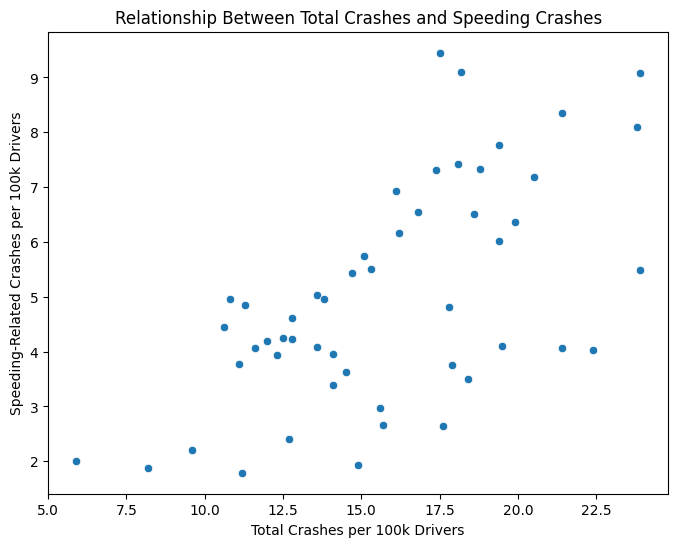

In [194]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['total'], y=df['speeding'])
plt.xlabel("Total Crashes per 100k Drivers")
plt.ylabel("Speeding-Related Crashes per 100k Drivers")
plt.title("Relationship Between Total Crashes and Speeding Crashes")
plt.show()


***Story***
- The points show a general upward trend: states with more total crashes also tend to have more speeding-related crashes.

# Visualization 2: Distribution of Insurance Premiums
***Goal***
- Explore the distribution of insurance premiums across states.
- Are there extreme values (high-cost or low-cost states)?

***Chart Type***
- Histogram: Helps visualize how insurance premiums are distributed.

***Chart***

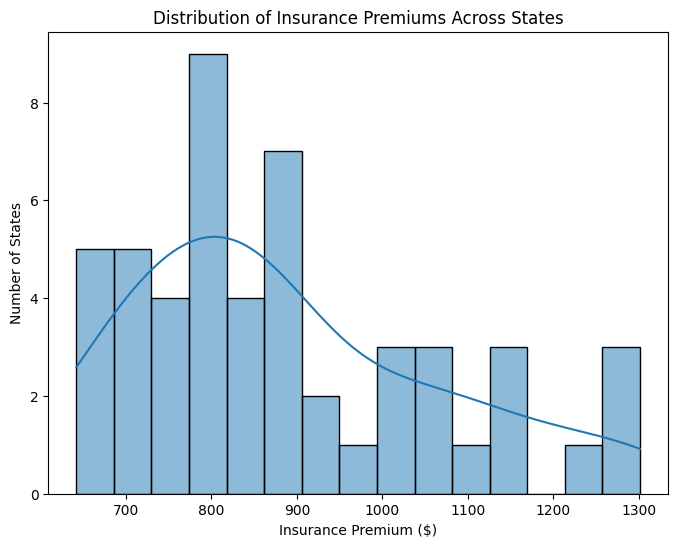

In [195]:
plt.figure(figsize=(8,6))
sns.histplot(df['ins_premium'], bins=15, kde=True)
plt.xlabel("Insurance Premium ($)")
plt.ylabel("Number of States")
plt.title("Distribution of Insurance Premiums Across States")
plt.show()


***Story***
- The histogram is right-skewed, meaning some states have significantly higher insurance costs.

# Visualization 3: Risk Level of States
***Goal***
- Compare the number of High-Risk vs. Low-Risk states based on total crashes.

***Chart Type***
- Bar Plot: Since risk_level is a categorical variable, a bar chart is ideal.

***Chart***

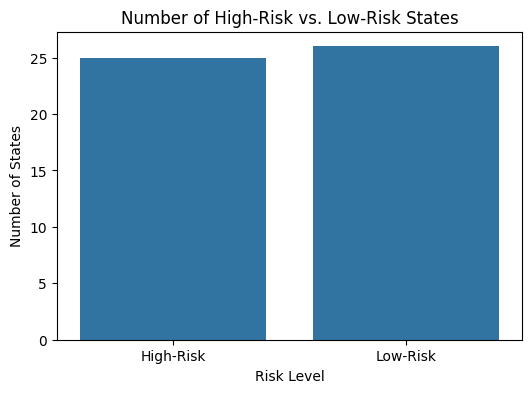

In [196]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['risk_level'])
plt.xlabel("Risk Level")
plt.ylabel("Number of States")
plt.title("Number of High-Risk vs. Low-Risk States")
plt.show()


***Story***
- Fairly Even Split – The distribution of car crash risks across states is nearly balanced, meaning there isn’t a strong skew towards one category.
- Comparing this to other factors (like insurance premiums, alcohol use, or speeding) might show what contributes to risk levels.

# Visualization 4: Insurance Premiums by Risk Level
***Goal***
- Compare the distribution of insurance premiums between high-risk and low-risk states to see if high-risk states tend to have higher or lower insurance premiums.

***Chart Type***
- Box Plot: Compares the spread of insurance premiums for high- and low-risk states.

***Chart***

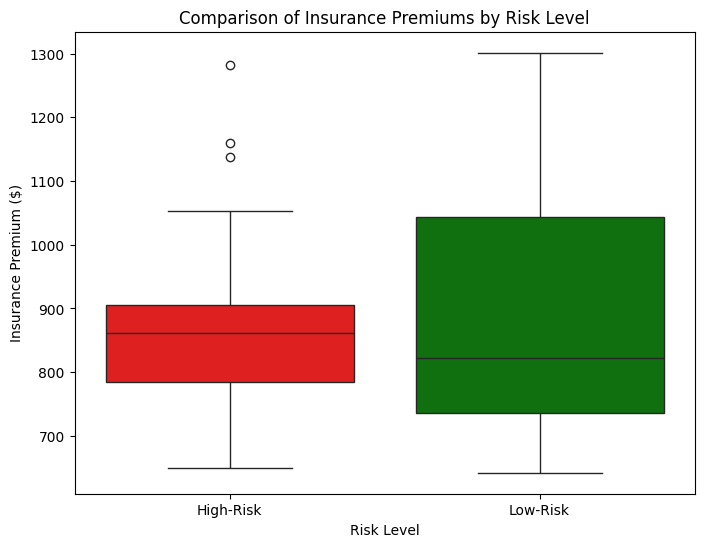

In [197]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='risk_level', y='ins_premium', data=df, hue='risk_level', palette=['red', 'green'], legend=False)

plt.xlabel("Risk Level")
plt.ylabel("Insurance Premium ($)")
plt.title("Comparison of Insurance Premiums by Risk Level")

plt.show()



***Story***
- High-risk states have a tighter range of insurance premiums, with less variation between states.
- On average, high-risk states have slightly higher insurance premiums than low-risk states.
- Low-risk states show a wider range of premiums, indicating more variability.
- There are a few outliers in high-risk states with much higher premiums than the rest.


# Visualization 5: Proportions of Different Causes of Accidents
***Goal***
- Interpret which factors play the biggest role in car crashes nationwide. 

***Chart Type***
- Pie Chart: Shows how much each factor contributes as a percentage of total accidents.

***Chart***

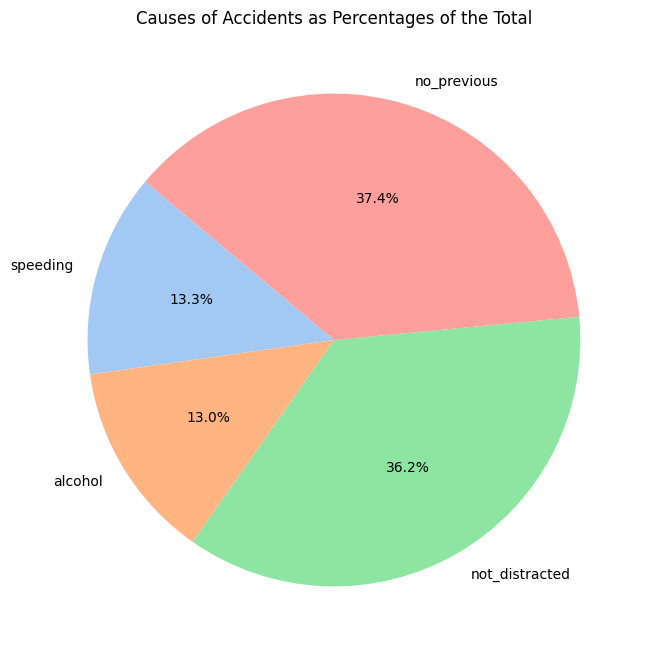

In [198]:
# Calculate the sum of all accident causes
causes = ['speeding', 'alcohol', 'not_distracted', 'no_previous']
cause_sums = df[causes].sum()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(cause_sums, labels=causes, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title("Causes of Accidents as Percentages of the Total")
plt.show()


***Story***
- “No Previous” and “Not Distracted” together make up 73.6% of crashes.
- Speeding and alcohol-related crashes account for 13.3% and 13%, respectively.
- “No Previous” is the largest individual factor at 37.4%, indicating many accidents involve drivers with clean records.
- “Not Distracted” is at 36.2%, meaning many crashes happen even when drivers are paying attention.


# Step 8. Initial Storytelling and Presentation
In this project, we explored the Seaborn Car Crashes dataset to understand accident trends and insurance premiums. We used visualizations and statistical analysis to uncover patterns, like how speeding and alcohol-related crashes are important but not the main causes. We also looked at the relationship between total crashes and speeding, as well as how insurance premiums vary across different risk levels.

# Key Findings
***Total Crashes and Contributing Factors***
The data shows that some states have way more crashes than others, creating a bimodal distribution. Most states have fewer crashes, but a few have a lot. Speeding and alcohol-related accidents are more common in some states but aren't the main cause of crashes. The biggest factors are “Not Distracted” and “No Previous,” which together make up over 70% of crashes.

***Speeding and Total Crashes***
There's a noticeable link between total crashes and speeding-related crashes. States with more crashes also tend to have more speeding issues, which suggests that enforcing speed limits in high-risk states could help reduce accidents.

***Insurance Premiums and Risk Levels***
States with more crashes (high-risk) usually have higher insurance premiums, but the difference isn’t huge. Low-risk states have more variation in premiums, which suggests other factors besides crash rates affect insurance costs.

***High-Risk vs. Low-Risk States***
There’s a pretty even split between high-risk and low-risk states. It would be interesting to dive deeper and look at whether things like population density or weather play a role in determining risk levels.

***Causes of Accidents***
The biggest cause of accidents is “No Previous” drivers, which challenges the idea that repeat offenders cause most crashes. Speeding and alcohol contribute but don’t make up the majority of crashes. “Not Distracted” accounts for a large chunk of accidents too, meaning other factors like road conditions or vehicle problems could be at play.


# Conclusion and Next Steps
This analysis gives us valuable insights into car crash trends and insurance premiums. We found some interesting patterns, like how speeding and alcohol-related crashes are significant but not the biggest contributors, and how many accidents happen with drivers who don’t have prior incidents.

However, there are a few areas that could be explored further:

- Regional Differences: It would be interesting to see how accident rates and insurance premiums differ across regions, like urban versus rural states.
- Policy Considerations: We might want to think about stricter enforcement of speeding and alcohol laws in states with higher crash rates.
- Other Factors: Adding data like weather conditions, road quality, or vehicle types could help us understand accidents better.

This project shows how data can guide decisions to improve road safety and insurance strategies. There's a lot more we could do with this dataset to dive deeper into these trends!